# <font color = 'pickle'> **Multi_Label_Classification_bag_of_words_Neural_Network**

<font color = 'green'>  <b>Objective:<b>
    
<font color = 'green'> Train NN for multilabel Classification </font>

# <Font color = 'pickle'>**Load Libraries/Install Software**

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
else:
  print('Not running on CoLab')

Running on CoLab


In [3]:
# Install wandb and update it to the latest version
if 'google.colab' in str(get_ipython()):
    !pip install wandb --upgrade -q

     |████████████████████████████████| 1.9 MB 6.2 MB/s 
     |████████████████████████████████| 168 kB 4.6 MB/s 
     |████████████████████████████████| 182 kB 48.9 MB/s 
     |████████████████████████████████| 62 kB 552 kB/s 
     |████████████████████████████████| 168 kB 70.9 MB/s 
     |████████████████████████████████| 166 kB 53.3 MB/s 
     |████████████████████████████████| 166 kB 49.7 MB/s 
     |████████████████████████████████| 162 kB 14.9 MB/s 
     |████████████████████████████████| 162 kB 52.8 MB/s 
     |████████████████████████████████| 158 kB 57.7 MB/s 
     |████████████████████████████████| 157 kB 32.3 MB/s 
     |████████████████████████████████| 157 kB 58.2 MB/s 
     |████████████████████████████████| 157 kB 51.9 MB/s 
     |████████████████████████████████| 157 kB 51.8 MB/s 
     |████████████████████████████████| 157 kB 49.9 MB/s 
     |████████████████████████████████| 157 kB 55.7 MB/s 
     |████████████████████████████████| 157 kB 50.3 MB/s 
     |████████████

In [4]:
# Install wandb and update it to the latest version
if 'google.colab' in str(get_ipython()):
    !pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# mount google drive
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive',force_remount = True)

Mounted at /content/drive


In [7]:
# Importing the necessary libraries
# pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchtext.vocab import  vocab
from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR, StepLR

# python 
import random
from datetime import datetime
import numpy as np
import pandas as pd
import joblib
from collections import Counter
from types import SimpleNamespace
from pathlib import Path
import sys

# logging
import wandb

#pre-processing
import spacy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer as mlb
from sklearn.feature_extraction.text import TfidfVectorizer
from ast import literal_eval

# Importing the necessary libraries
import numpy as np
import pandas as pd

from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


import gensim
from gensim.models import KeyedVectors
import sys
import joblib

In [8]:
# if 'google.colab' in str(get_ipython()):
!python -m spacy download 'en_core_web_sm'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 34.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
# Login to W&B
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# <Font color = 'pickle'>**Specify Project Folders**

In [10]:
base_folder = Path('/content/drive/MyDrive/NLP_Fall22/HW6')
data_folder = base_folder/'Data'
model_folder = base_folder/'Models'
custom_functions = base_folder/'Scripts/custom_function'

In [11]:
sys.path.append(str(custom_functions))

In [12]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/NLP_Fall22/HW6/Scripts/custom_function']

In [13]:
import custom_preprocessor as cp
import custom_preprocessor as cp
from  plot_learning_curve import plot_learning_curve as plc


In [14]:
spacy.__version__

'3.4.3'

# <font color = 'pickle'> Load Data set
    
<font color = 'green'> <b>You will create train/valid/test splits from this data set. Use 60% for train, 20 % for the test, and remaining 20% for  validation dataset.<b>

In [15]:
df = joblib.load(data_folder/'df_multilabel_hw.joblib')

In [24]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Id,Title,Body,Tags,Tag_Number
0,35264,3589944,3589945,ASP Query String From DropDown,<p>I have a webpage: <strong>Menu.aspx</strong...,c# asp.net,"[0, 9]"
1,56592,5756414,5756415,How can I run JavaScript code at server side J...,<p>I want to run JavaScript code at the server...,java javascript,"[1, 3]"
2,23303,2358596,2358597,linq to sql throwing an exception row not foun...,<p>Hi I am linq to sql and i am getting the er...,c# asp.net,"[0, 9]"
3,42563,4332881,4332882,Running a Python script on a PHP server,"<p>I am running a nginx web server, along with...",php python,"[2, 7]"
4,58216,5922132,5922133,some advice on how to write a window.resize fu...,<p>Im trying to write a function that resizes ...,javascript jquery,"[3, 5]"


In [25]:
df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Tags', 'Id'])

# <font color = 'pickle'> Pre-processing

In [26]:
df['combined_text'] = df.apply(lambda x: str(x['Title']) + ' ' + str(x['Body']), axis = 1 )

In [27]:
df.head()

,Title,Body,Tag_Number,combined_text
0,ASP Query String From DropDown,<p>I have a webpage: <strong>Menu.aspx</strong...,"[0, 9]",ASP Query String From DropDown <p>I have a web...
1,How can I run JavaScript code at server side J...,<p>I want to run JavaScript code at the server...,"[1, 3]",How can I run JavaScript code at server side J...
2,linq to sql throwing an exception row not foun...,<p>Hi I am linq to sql and i am getting the er...,"[0, 9]",linq to sql throwing an exception row not foun...
3,Running a Python script on a PHP server,"<p>I am running a nginx web server, along with...","[2, 7]",Running a Python script on a PHP server <p>I a...
4,some advice on how to write a window.resize fu...,<p>Im trying to write a function that resizes ...,"[3, 5]",some advice on how to write a window.resize fu...


In [28]:
# need to run only once, students are provided teh file with cleaned dataset

cleaned_text_lemma_stop_removal = cp.SpacyPreprocessor(model = 'en_core_web_lg', 
                                    
                                    remove_stop=True).transform(df['combined_text'].values)
                                


In [29]:
cleaned_text_lemma_stop_removal

['asp query string dropdown webpage following control relevance    dropdownlist value hyperlink redirect page call   page cancel button redirect user menu page like user click hyperlink edit page index dropdownlist preserve query string page follow aspx code sure proceed < asp hyperlink      id="lnkedit      navigateurl=\'<% + eval("userid + sure > < /asp hyperlink >   < asp dropdownlist      id="mydropdown      < asp listitems/ > < /asp dropdownlist >   edit clarify m navigateurl query string eval determine user id',
 'run javascript code server java code want run javascript code server want manipulate result return javascript inside java code',
 'linq sql throw exception row find change hi linq sql get error row find change update table help linq query show error unable figure problem work get permanent solution fix problem twtmob_campainincomedetails_tb incomedetail = datacontext.twtmob_campainincomedetails_tbs single(twtincome = > = = tempincome                  decimal temppayout 

In [32]:
!pip install swifter
from bs4 import BeautifulSoup
def RemoveHTML(text):
  return BeautifulSoup(text , "html.parser").get_text()
df['cleaned_text_lemma_stop_removal'] = cleaned_text_lemma_stop_removal 
df['combined_text'] = df['cleaned_text_lemma_stop_removal'].apply(RemoveHTML)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
df.drop(columns = ['cleaned_text_lemma_stop_removal'], inplace = True)

## <Font color = 'pickle'>**Create Train/Test/Valid Split**


In [15]:
file = data_folder/'df_multilabel_hw_cleaned.joblib'

In [ ]:
joblib.dump(df, file )

In [16]:
df = joblib.load(file)

In [17]:
df.head()

,Title,Body,Tag_Number,combined_text
0,ASP Query String From DropDown,<p>I have a webpage: <strong>Menu.aspx</strong...,"[0, 9]",asp query string dropdown webpage following co...
1,How can I run JavaScript code at server side J...,<p>I want to run JavaScript code at the server...,"[1, 3]",run javascript code server java code want run ...
2,linq to sql throwing an exception row not foun...,<p>Hi I am linq to sql and i am getting the er...,"[0, 9]",linq sql throw exception row find change hi li...
3,Running a Python script on a PHP server,"<p>I am running a nginx web server, along with...","[2, 7]",run python script php server run nginx web ser...
4,some advice on how to write a window.resize fu...,<p>Im trying to write a function that resizes ...,"[3, 5]",advice write function m try write function res...


# <font color = 'pickle'> Get Targets and Text

## <font color = 'pickle'> Convert text to embeddings

In [18]:
X = df['combined_text'].values

In [19]:
y = df['Tag_Number'].values

## <font color = 'pickle'> Convert Targets from strings to lists

<font size = 3, color = 'green'>y is an object and it treats the brackets and quotes as part of the object. We need to extract only number and then do one hot encoding using sklearn's MultiLabelbinarizer. We can use python built in eval() function to evaluate strings. Howeber, we will use ast.literal_eval as it is a safer option. ast.literal_eval raises an exception if the input is not a valid Python datatype, so the code will not execute if it is not.

In [20]:
!pip install swifter
import swifter
df['Tag_Number_list'] = df['Tag_Number'].swifter.apply(lambda x: literal_eval(x))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 830 kB 27.7 MB/s 
     |████████████████████████████████| 280 kB 69.0 MB/s 
     |████████████████████████████████| 1.6 MB 58.0 MB/s 
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=14a2ba03552db3ed28b47c8221f5ba5920ef2498860fee8db55b4cf192f7932b
  Stored in directory: /root/.cache/pip/wheels/29/a7/0e/3a8f17ac69d759e1e93647114bc9bdc95957e5b0cbfd405205
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


Pandas Apply:   0%|          | 0/47427 [00:00<?, ?it/s]

In [21]:
y_final = df['Tag_Number_list'].values

In [22]:
y_final[0]

[0, 9]

## <font color = 'pickle'> Multilable Binarizer for Targets

In [23]:
y_one_hot = mlb().fit_transform(y_final)

In [24]:
y_one_hot[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [25]:
y_one_hot.shape

(47427, 10)

In [26]:
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y_one_hot, test_size = 0.40, random_state=42)

In [27]:
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size = 0.50, random_state=42)

In [28]:
print(len(X_train), len(X_valid), len(X_test))

28456 9485 9486


# <font color = 'pickle'> Create Dataset

In [29]:
class CustomDataset(torch.utils.data.Dataset):
    """IMDB dataset."""

    def __init__(self, X, y):
        self.X = np.array(X)
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        text = self.X[idx]
        labels = self.y[idx]
        sample = (text, labels)
        
        return sample

In [30]:
trainset = CustomDataset(X_train,y_train)
validset = CustomDataset(X_valid,y_valid)
testset = CustomDataset(X_test,y_test)

##  <font color = 'pickle'> Use TensorDatset class to create datasets
<font color = 'green'> Since both X and y are tensors, we do not need to create a custom class

In [31]:
print(len(trainset), len(validset), len(testset))

28456 9485 9486


In [32]:
trainset.__getitem__([11])

(array(['code multiple button navigation java activity question 1 2 activity wonder optimize create 2 activity multiple listener create multiple java file button(onclick listener question 2 try create multiple listener java button work syntax multiple listener java file update code issue matter button click lead page      package import activity import context import intent import bundle import button import view import view onclicklistener   public class activity1 extend activity2   button button1 button button2 button button3 button button4 button button5 button button6   public void oncreate(bundle savedinstancestate      super.oncreate(savedinstancestate      setcontentview(r.layout.fineline      addlisteneronbutton      public void addlisteneronbutton   final context context =   button1 = button findviewbyid(r.id.autobody   button1.setonclicklistener(new onclicklistener        public void onclick(view arg0           intent intent = new intent(context          startactivity(intent 

In [33]:
# x_vector
trainset[0][0]

'rearrange order list web page base current day work web site restaurant daily specials list take vertical space   < li > consist day week special description like encapsulate list jscrollpane require user scroll find special day want special current day present special list   example today wednesday list order follow   wednesday thursday friday saturday sunday monday tuesday   special change foreseeable future   currently unordered list < ul >   good method achieve'

In [34]:
# y_vector
trainset[0][1]

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0])

## <font color = 'blue'> Create Vocab

In [35]:
def create_vocab(dataset, min_freq):
  counter = Counter()
  for (text, _) in dataset:
    counter.update(str(text).split())
  my_vocab = vocab(counter, min_freq=min_freq)
  my_vocab.insert_token('<unk>', 0)
  my_vocab.set_default_index(0)
  return my_vocab

<font color = 'green'> vocab should always be created based on trainset

In [36]:
imdb_vocab = create_vocab(trainset, min_freq = 2)

In [37]:
len(imdb_vocab)

85693

In [38]:
imdb_vocab.get_itos()[0:5]

['<unk>', 'rearrange', 'order', 'list', 'web']

In [39]:
imdb_vocab['rearrange']

1

## <font color = 'blue'> Collate_fn for Data Loaders

In [40]:
# Creating a lambda function objects that will be used to get the indices of words from vocab
text_pipeline = lambda x: [imdb_vocab[token] for token in str(x).split()]
vector = np.vectorize(np.int_)
label_pipeline = lambda x: vector(x)

In [41]:
'''
We know that input to the embedding layers are indices of words from the vocab.
The collate_batch() accepts batch of data and gets the indices of text from vocab and returns the same
We will include this collate_batch() in collat_fn attribute of DataLoader.
So it will create a batch of data containing indices of words and corresponding labels.
But for EmbeddingBag we need one more extra parameter, that is offset.
offsets determines the starting index position of each bag (sequence) in input.
'''
def collate_batch(batch):
    text_list, label_list, offsets = [], [], [0]
    for (_text ,_label) in batch:
         label_list.append(label_pipeline(_label))
         processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
         text_list.append(processed_text)
         offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)
    return text_list, label_list, offsets

## <font color = 'pickle'> **Check Data Loader**

In [42]:
batch_size=3
check_loader = torch.utils.data.DataLoader(dataset=validset,
                                        batch_size=batch_size,
                                        shuffle=True,
                                        collate_fn=collate_batch)

In [43]:
for text, label, offsets in check_loader:
  print(label, text, offsets)
  break

tensor([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 1]]) tensor([ 1270,    98,  2612,  2779,   344,  7973,     9, 15330,  2447,  1270,
          391,    98,     0,   482,    94,   950,  5632,  2653,   838,   974,
        69969,    98,  2275, 11748,   668,  2612,  5475, 26015,   634,  1864,
         3000,  1230,  3330,   483,   843,  1270,  4859, 11575,     0, 26218,
          785,    98, 19202,  2612,  2779, 43919,  2779,     0,  4417,  7973,
        36242,   757,     4,  2632,   402,   577, 44271,    50,   342,    86,
          885,    94,   491,  2779, 50528,     9,  3228,  2612,  2779,   190,
          189,   319,   765,  3228,   757,   634,   645,   581,   426,  7481,
         2612,  2779,    98,  2183, 13430, 73416, 70888,  3574,  2779, 79785,
          378,  5933,    49,  1126,     0,     0,     0, 17842,  2779,  2612,
           49,  2557,  3228,  3228,  4769,  5400, 10044,  2445,  7100,  3647,
         1751,  2946,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  app.launch_new_instance()


## <font color = 'pickle'> Small Sample

In [44]:
# Fix seed value
SEED = 2345
random.seed(SEED)

# We will be using 500 observations for text and 100 for valid daatset
# We do not need valid for overfitting, it will help to check errors in code
train_sample_size = 500
valid_sample_size = 100

# Getting n random indices
train_subset_indices = random.sample(range(0, len(trainset)), train_sample_size)
valid_subset_indices = random.sample(range(0, len(validset)), valid_sample_size)

# Getting subset of dataset
train_subset = torch.utils.data.Subset(trainset, train_subset_indices)
valid_subset = torch.utils.data.Subset(validset, valid_subset_indices)

# <font color = 'pickle'> **Model for ANN**


In [150]:
from torch import nn
class MLPCustom(nn.Module):
  def __init__(self, embed_dim, vocab_size, hidden_dim1, hidden_dim2, output_dim, non_linearity):

    super().__init__()    
    self.embed_dim = embed_dim
    self.hidden_dim1 = hidden_dim1
    self.hidden_dim2 = hidden_dim2
    self.output_dim = output_dim
    self.vocab_size = vocab_size
    self.non_linearity = non_linearity

    # embedding_layer
    self.embedding = nn.EmbeddingBag(self.vocab_size, self.embed_dim)

    # hidden layer 1
    self.hidden_layer1 = nn.Linear(self.embed_dim, self.hidden_dim1)

    # dropout layer 1
    self.drop1 = nn.Dropout(p= 0.5)

    # batch layer norm 1
    self.batchnorm1 = nn.BatchNorm1d(num_features=self.hidden_dim1)

    # hidden layer 2
    self.hidden_layer2 = nn.Linear(self.hidden_dim1, self.hidden_dim2)
    
    # dropout layer 2
    self.drop2 = nn.Dropout(p= 0.5)

    # batch layer norm 2    
    self.batchnorm2 = nn.BatchNorm1d(num_features=self.hidden_dim2)
    
    # output layer
    self.output_layer = nn.Linear(self.hidden_dim2, self.output_dim)

  def forward(self, input_ , offsets):
    embed_out = self.embedding(input_, offsets) # batchsize, embedding_dim

    hout1 = self.non_linearity(self.hidden_layer1(embed_out)) # batchsize, hidden_dim1
    hout1 = self.batchnorm1(hout1)
    hout1 = self.drop1(hout1)
    
    hout2 = self.non_linearity(self.hidden_layer2(hout1)) # batchsize, hidden_dim2
    hout2 = self.batchnorm2(hout2)
    hout2 = self.drop2(hout2)
    
    ypred = self.output_layer(hout2)

    return ypred

## <Font color = 'pickle'>**Function for Training  Loops**

**Model Training** involves five steps: 

- Step 0: Randomly initialize parameters / weights
- Step 1: Compute model's predictions - forward pass
- Step 2: Compute loss
- Step 3: Compute the gradients
- Step 4: Update the parameters
- Step 5: Repeat steps 1 - 4

Model training is repeating this process over and over, for many **epochs**.

We will specify number of ***epochs*** and during each epoch we will iterate over the complete dataset and will keep on updating the parameters.

***Learning rate*** and ***epochs*** are known as hyperparameters. We have to adjust the values of these two based on validation dataset.

We will now create functions for step 1 to 4.

In [179]:
def train(train_loader, model, optimizer, loss_function, log_batch, log_interval, grad_clipping, max_norm):

  """ 
  Function for training the model in each epoch
  Input: iterator for train dataset, initial weights and bias, epochs, learning rate.
  Output: final weights, bias, train loss, train accuracy
  """
  # initilalize variables as global
  # these counts will be updated every epoch
  global example_ct_train
  global batch_ct_train

  # Training Loop loop
  # Initialize train_loss at the he start of the epoch
  running_train_loss = 0
  #running_train_correct = 0
  
  # put the model in training mode
  model.train()

  # Iterate on batches from the dataset using train_loader
  for input_, targets, offsets in train_loader:
    
    # move inputs and outputs to GPUs
    input_ = input_.to(device)
    targets = targets.to(device)
    offsets = offsets.to(device)

    # Forward pass
    output = model(input_, offsets)
    loss = loss_function(output, targets.float())

    # Correct prediction
    #y_pred = torch.math.greater(output, 0.5)
    #correct = torch.sum(y_pred == targets)

    example_ct_train +=  len(targets)
    batch_ct_train += 1

    # set gradients to zero 
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Gradient Clipping
    if grad_clipping:
      nn.utils.clip_grad_norm_(model.parameters(), max_norm=max_norm, norm_type=2)

    # Update parameters using their gradient
    optimizer.step()
          
    # Add train loss of a batch 
    running_train_loss += loss.item()

    # Add Corect counts of a batch
    #running_train_correct += correct

    # log batch loss and accuracy
    if log_batch:
      if ((batch_ct_train + 1) % log_interval) == 0:
        wandb.log({f"Train Batch Loss  :": loss})
        #wandb.log({f"Train Batch Acc :": correct/len(targets)})
 
  # Calculate mean train loss for the whole dataset for a particular epoch
  train_loss = running_train_loss/len(train_loader)

  # Calculate accuracy for the whole dataset for a particular epoch
  #train_acc = running_train_correct/len(train_loader.dataset)

  return train_loss

## <Font color = 'pickle'>**Function for Validation Loops**


In [180]:
def valid(loader, model, optimizer, loss_function, log_batch, log_interval):

  """ 
  Function for training the model and plotting the graph for train & valid loss vs epoch.
  Input: iterator for train dataset, initial weights and bias, epochs, learning rate, batch size.
  Output: final weights, bias and train loss and valid loss for each epoch.
  """

  # initilalize variables as global
  # these counts will be updated every epoch
  global example_ct_valid
  global batch_ct_valid

  # Validation loop
  # Initialize train_loss at the he strat of the epoch
  running_valid_loss = 0
  #running_valid_correct = 0
  
  # put the model in evaluation mode
  model.eval()

  with torch.no_grad():
    for input_,targets, offsets in loader:

      # move inputs and outputs to GPUs
      input_ = input_.to(device)
      targets = targets.to(device)
      offsets = offsets.to(device)

      # Forward pass
      output = model(input_, offsets)
      loss = loss_function(output,targets.float())

      # count of images and batches
      example_ct_valid +=  len(targets)
      batch_ct_valid += 1

      # Add valid loss of a batch 
      running_valid_loss += loss.item()

      # log batch loss and accuracy
      if log_batch:
        if ((batch_ct_valid + 1) % log_interval) == 0:
          wandb.log({f"Valid Batch Loss  :": loss})
          #wandb.log({f"Valid Batch Accuracy :": correct/len(targets)})

    # Calculate mean valid loss for the whole dataset for a particular epoch
    valid_loss = running_valid_loss/len(valid_loader)
    
  return valid_loss

## <Font color = 'pickle'>**Function for Model Training**
    
We will now create a function for step 5 of model training


In [181]:

def train_loop(train_loader, valid_loader, model, loss_function, optimizer, epochs, device, patience, early_stopping,
               file_model):

  '''
  model: specify your model for training
  criterion: loss function 
  optimizer: optimizer like SGD , ADAM etc.
  train loader: function to carete batches for training data
  valid loader : function to create batches for valid data set
  file_model : specify file name for saving your model. This way we can upload the model weights from file. We will not to run model again.
  

  '''
  # Create lists to store train and valid loss at each epoch

  train_loss_history = []
  valid_loss_history = []
  #train_acc_history = []
  #valid_acc_history = []
  
  delta = 0
  best_score = None
  valid_loss_min = np.Inf
  counter_early_stop=0
  early_stop= False

  from datetime import datetime
  # Iterate for the given number of epochs
  for epoch in range(epochs):
    t0 = datetime.now()
    # Get train loss and accuracy for one epoch

    train_loss = train(train_loader, model, optimizer, loss_function, 
                                  wandb.config.LOG_BATCH, wandb.config.LOG_INTERVAL,
                                  wandb.config.GRAD_CLIPPING, wandb.config.MAX_NORM)
    valid_loss = valid(valid_loader, model, optimizer, loss_function,
                                    wandb.config.LOG_BATCH, wandb.config.LOG_INTERVAL)

    dt = datetime.now() - t0

    # Save history of the Losses and accuracy
    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
   
    if early_stopping:
      score = -valid_loss
      if best_score is None:
        best_score=score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving Model...')
        torch.save(model.state_dict(), file_model)
        valid_loss_min = valid_loss

      elif score < best_score + delta:
        counter_early_stop += 1
        print(f'Early stoping counter: {counter_early_stop} out of {patience}')
        if counter_early_stop > patience:
          early_stop = True
      
      else:
        best_score = score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving model...')
        torch.save(model.state_dict(), file_model)
        counter_early_stop=0
        valid_loss_min = valid_loss

      if early_stop:
        print('Early Stopping')
        break

    else:

      score = -valid_loss
      if best_score is None:
        best_score=score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving Model...')
        torch.save(model.state_dict(), file_model)
        valid_loss_min = valid_loss

      elif score < best_score + delta:
        print(f'Validation loss has not decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Not Saving Model...')
      
      else:
        best_score = score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving model...')
        torch.save(model.state_dict(), file_model)
        valid_loss_min = valid_loss

    # Log the train and valid loss to W&B
    wandb.log({f"Train epoch Loss :": train_loss, f"Valid epoch Loss :": valid_loss })
 
    # Print the train loss and accuracy for given number of epochs, batch size and number of samples
    print(f'Epoch : {epoch+1} / {epochs}')
    print(f'Time to complete {epoch+1} is {dt}')
    # print(f'Learning rate: {scheduler._last_lr[0]}')
    print(f'Train Loss: {train_loss : .4f}')
    print(f'Valid Loss: {valid_loss : .4f}')
    print()
    torch.cuda.empty_cache()

  return train_loss_history, valid_loss_history

## <Font color = 'pickle'>**Function to get Predictions**

Now we have final values for weights and bias after training the model. We will use these values to make predictions on the test dataset.

In [186]:
def get_pred(data_loader, model):
  """ 
  Function to get predictions for a given test set and calculate accuracy.
  Input: Iterator to the test set.
  Output: Prections and Accuracy for test set.
  """
  model.eval()
  with torch.no_grad():
    # Array to store predicted labels
    predictions = torch.Tensor()
    predictions = predictions.to(device)
    
    outputs = torch.Tensor()
    outputs = outputs.to(device)

    # Array to store actual labels
    y = torch.Tensor()
    y = y.to(device)
    # Iterate over batches from test set
    for inputs, targets, offsets in data_loader:
      
      # move inputs and outputs to GPUs
      inputs = inputs.to(device)
      targets = targets.to(device)
      offsets = offsets.to(device)
      
      # Calculated the predicted labels
      output = model(inputs,offsets)
      predicted_y = output.clone()
  
      # Update teh output 
      predicted_y[predicted_y>0] = 1
      predicted_y[predicted_y<=0] =0

      # Add the predicted labels to the array
      predictions = torch.cat((predictions, predicted_y)) 
    
      outputs = torch.cat((outputs, output)) 

      # Add the actual labels to the array
      y = torch.cat((y, targets)) 

  # Return array containing predictions and accuracy
  return y, predictions
  

# <Font color = 'pickle'>**Meta Data**

In [170]:
from types import SimpleNamespace
import torch.nn.functional as F

hyperparameters = SimpleNamespace(
    EMBED_DIM = 400,
    VOCAB_SIZE = len(imdb_vocab),
    OUTPUT_DIM = 10,
    HIDDEN_DIM1 = 200,
    HIDDEN_DIM2 = 100,
    NON_LINEARITY= F.relu,
    EPOCHS = 40,
    TASK = 2,
    BATCH_SIZE = 256,
    LEARNING_RATE = 0.01,
    DATASET="Multilabel",
    ARCHITECTUREe="HW6B_embedbag_2hiddenlayers",
    LOG_INTERVAL = 25,
    LOG_BATCH = True,
    FILE_MODEL = data_folder/'HW6B.pt',
    GRAD_CLIPPING = False,
    MAX_NORM = 0,
    MOMENTUM = 0,
    PATIENCE = 5,
    EARLY_STOPPING = True,
    WEIGHT_DECAY = 0,
    SAVE_BEST_MODEL = True,
    DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    )

# <Font color = 'pickle'>**Data Loaders, Loss Function, Optimizer**

In [171]:
# Initialize a new project
import random
wandb.init(name = 'EmbedBagNN', project = 'NLP_HW6B')

In [172]:
wandb.config = hyperparameters
wandb.config

namespace(ARCHITECTUREe='HW6B_embedbag_2hiddenlayers', BATCH_SIZE=256, DATASET='Multilabel', DEVICE=device(type='cuda', index=0), EARLY_STOPPING=True, EMBED_DIM=400, EPOCHS=40, FILE_MODEL=PosixPath('/content/drive/MyDrive/NLP_Fall22/HW6/Data/HW6B.pt'), GRAD_CLIPPING=False, HIDDEN_DIM1=200, HIDDEN_DIM2=100, LEARNING_RATE=0.01, LOG_BATCH=True, LOG_INTERVAL=25, MAX_NORM=0, MOMENTUM=0, NON_LINEARITY=<function relu at 0x7f007c6caa70>, OUTPUT_DIM=10, PATIENCE=5, SAVE_BEST_MODEL=True, TASK=2, VOCAB_SIZE=85693, WEIGHT_DECAY=0)

In [174]:
# Fix seed value
SEED = 2345
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

# Data Loader
train_loader = torch.utils.data.DataLoader(trainset, batch_size=wandb.config.BATCH_SIZE, shuffle = True, 
                                            num_workers = 12, collate_fn=collate_batch)
valid_loader =  torch.utils.data.DataLoader(validset,  collate_fn=collate_batch,batch_size=wandb.config.BATCH_SIZE, shuffle = False, 
                                            num_workers = 12)
test_loader = torch.utils.data.DataLoader(testset, collate_fn=collate_batch, batch_size=wandb.config.BATCH_SIZE, shuffle = False, 
                                            num_workers = 12)

# cross entropy loss function
loss_function = nn.BCEWithLogitsLoss()
 
# model 
model_hw6_part_b_task1 = MLPCustom(wandb.config.EMBED_DIM, 
                  wandb.config.VOCAB_SIZE,
                  wandb.config.HIDDEN_DIM1, 
                  wandb.config.HIDDEN_DIM2,
                  wandb.config.OUTPUT_DIM, 
                  wandb.config.NON_LINEARITY)

model_hw6_part_b_task1.to(wandb.config.DEVICE)

def init_weights(m):
  if type(m) == nn.Linear:
      torch.nn.init.kaiming_normal_(m.weight)
      torch.nn.init.zeros_(m.bias)
        
# apply initialization recursively  to all modules
model_hw6_part_b_task1.apply(init_weights)

optimizer = torch.optim.Adam(model_hw6_part_b_task1.parameters(), lr = wandb.config.LEARNING_RATE, 
                            weight_decay=wandb.config.WEIGHT_DECAY)

wandb.config.OPTIMIZER = optimizer


In [175]:
wandb.config

namespace(ARCHITECTUREe='HW6B_embedbag_2hiddenlayers', BATCH_SIZE=256, DATASET='Multilabel', DEVICE=device(type='cuda', index=0), EARLY_STOPPING=True, EMBED_DIM=400, EPOCHS=40, FILE_MODEL=PosixPath('/content/drive/MyDrive/NLP_Fall22/HW6/Data/HW6B.pt'), GRAD_CLIPPING=False, HIDDEN_DIM1=200, HIDDEN_DIM2=100, LEARNING_RATE=0.01, LOG_BATCH=True, LOG_INTERVAL=25, MAX_NORM=0, MOMENTUM=0, NON_LINEARITY=<function relu at 0x7f007c6caa70>, OPTIMIZER=Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.01
    maximize: False
    weight_decay: 0
), OUTPUT_DIM=10, PATIENCE=5, SAVE_BEST_MODEL=True, TASK=2, VOCAB_SIZE=85693, WEIGHT_DECAY=0)

# <Font color = 'pickle'>**Sanity Check**
- Check the loss without any training. For Cross entropy the expected value will be log(number of classes)

In [176]:
for input_, targets, offsets in train_loader:
  
  # move inputs and outputs to GPUs
  input_ = input_.to(device)
  targets = targets.to(device)
  offsets = offsets.to(device)
  model_hw6_part_b_task1.eval()
  # Forward pass
  output = model_hw6_part_b_task1(input_, offsets)
  loss = loss_function(output, targets.float())
  print(f'Actual loss: {loss}')
  break

print(f'Expected Theoretical loss: {np.log(2)}')

Actual loss: 0.7295435070991516
Expected Theoretical loss: 0.6931471805599453


# <Font color = 'pickle'>**Training Model**

In [177]:
wandb.watch(model_hw6_part_b_task1, log = 'all', log_freq=25, log_graph=True)

wandb: logging graph, to disable use `wandb.watch(log_graph=False)`


In [182]:
example_ct_train, batch_ct_train, example_ct_valid, batch_ct_valid = 0, 0, 0, 0

train_loss_history, valid_loss_history = train_loop(train_loader, 
                                                    valid_loader, 
                                                    model_hw6_part_b_task1,
                                                    loss_function, 
                                                    optimizer, 
                                                    wandb.config.EPOCHS, 
                                                    wandb.config.DEVICE,
                                                    wandb.config.PATIENCE, 
                                                    wandb.config.EARLY_STOPPING,
                                                    wandb.config.FILE_MODEL)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Validation loss has decreased (inf --> 0.127384). Saving Model...
Epoch : 1 / 40
Time to complete 1 is 0:00:11.356360
Train Loss:  0.2547
Valid Loss:  0.1274

Validation loss has decreased (0.127384 --> 0.108257). Saving model...
Epoch : 2 / 40
Time to complete 2 is 0:00:11.309683
Train Loss:  0.1143
Valid Loss:  0.1083

Validation loss has decreased (0.108257 --> 0.105186). Saving model...
Epoch : 3 / 40
Time to complete 3 is 0:00:13.384921
Train Loss:  0.0834
Valid Loss:  0.1052

Early stoping counter: 1 out of 5
Epoch : 4 / 40
Time to complete 4 is 0:00:13.243192
Train Loss:  0.0660
Valid Loss:  0.1056

Early stoping counter: 2 out of 5
Epoch : 5 / 40
Time to complete 5 is 0:00:11.214650
Train Loss:  0.0554
Valid Loss:  0.1091

Early stoping counter: 3 out of 5
Epoch : 6 / 40
Time to complete 6 is 0:00:14.949094
Train Loss:  0.0453
Valid Loss:  0.1162

Early stoping counter: 4 out of 5
Epoch : 7 / 40
Time to complete 7 is 0:00:11.529739
Train Loss:  0.0395
Valid Loss:  0.1213

Early

## Load saved model from file 

In [183]:
model_nn = MLPCustom(wandb.config.EMBED_DIM, 
                     wandb.config.VOCAB_SIZE,
                     wandb.config.HIDDEN_DIM1, 
                     wandb.config.HIDDEN_DIM2, 
                  wandb.config.OUTPUT_DIM, 
                  wandb.config.NON_LINEARITY)
model_nn.to(  wandb.config.DEVICE)
model_nn.load_state_dict(torch.load(wandb.config.FILE_MODEL))

<All keys matched successfully>

In [184]:
print(wandb.config.FILE_MODEL)

/content/drive/MyDrive/NLP_Fall22/HW6/Data/HW6B.pt


In [187]:
# Get the prediction and labels
y_train,  y_predicted_train = get_pred(train_loader, model_nn)
y_valid, y_predicted_valid = get_pred(valid_loader, model_nn)
y_test,  y_predicted_test  = get_pred(test_loader, model_nn)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [189]:
!pip install torchmetrics
from torchmetrics import F1Score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 529 kB 34.1 MB/s 


In [190]:
f1score  = F1Score(num_classes=10, mdmc_average= 'global').to(device)

In [191]:
train_f1_score = f1score( y_predicted_train, y_train.long())

In [192]:
train_f1_score

tensor(0.9611, device='cuda:0')

In [193]:
# convert these to numpy array
y_train, y_predicted_train  = y_train.cpu().numpy(), y_predicted_train.cpu().numpy() 
y_valid, y_predicted_valid  = y_valid.cpu().numpy(), y_predicted_valid.cpu().numpy() 
y_test, y_predicted_test  = y_test.cpu().numpy(), y_predicted_test.cpu().numpy() 

In [194]:
from sklearn.metrics import f1_score

In [195]:
f1_score_train = f1_score(y_train, y_predicted_train, average = 'micro')
f1_score_valid = f1_score(y_valid, y_predicted_valid, average = 'micro')
f1_score_test = f1_score(y_test, y_predicted_test, average = 'micro')

In [196]:
# Print Accuracy based on saved Model
print('f1_score_train', f1_score_train)
print('f1_score_valid', f1_score_valid)
print('f1_score_test', f1_score_test)

f1_score_train 0.9611213964559641
f1_score_valid 0.9116506101477199
f1_score_test 0.9075405794123691


In [197]:
wandb.log({'Train f1 score': f1_score_train})
wandb.log({'Valid f1 score': f1_score_valid}) 
wandb.log({'Test f1 score': f1_score_test})

In [198]:
wandb.finish()

Test f1 score,▁
Train Batch Loss :,█▇▆▅▄▄▃▄▄▃▃▃▃▂▃▂▃▂▂▃▂▂▂▂▂▂▁▂▂▂▂▁▂▁▁▁▁▂▁▁
Train epoch Loss :,█▄▃▂▂▁▁▁
Train f1 score,▁
Valid Batch Loss :,▅▅▁▃▆▂▃▅▄▅▇▂█
Valid epoch Loss :,█▂▁▁▂▄▆█
Valid f1 score,▁
Test f1 score,0.90754
Train Batch Loss :,0.0267
Train epoch Loss :,0.03324
Train f1 score,0.96112


# STEP 2

In [46]:
raw_file = data_folder/'df_raw_small_hw.joblib'
df_raw = joblib.load(raw_file)

In [80]:
len(df_raw)

438813

In [48]:
df_raw = df_raw.drop(columns = ['Unnamed: 0', 'Id'])

### <font color = 'pickle'> Pre-processing

In [49]:
df_raw['combined_text'] = df_raw.apply(lambda x: str(x['Title']) + ' ' + str(x['Body']), axis = 1 )

In [73]:
import re
import string

In [55]:
!pip install swifter
from bs4 import BeautifulSoup
def RemoveHTML(text):
  return BeautifulSoup(text , "html.parser").get_text()
#df['cleaned_text_lemma_stop_removal'] = cleaned_text_lemma_stop_removal 
df_raw['combined_text'] = df_raw['combined_text'].apply(RemoveHTML)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
df_raw['combined_text'] = df_raw['combined_text'].swifter.apply(lambda x: x.lower())
df_raw['combined_text'] = df_raw['combined_text'].swifter.apply(lambda x: re.sub(re.compile(r"https?[A-Za-z0-9:/._\-]+"), "" , x))
df_raw['combined_text'] = df_raw['combined_text'].swifter.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


Pandas Apply:   0%|          | 0/438813 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/438813 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/438813 [00:00<?, ?it/s]

In [76]:
df_raw.drop(columns = ['Title','Body'], inplace = True)

In [77]:
df_raw.head()

,combined_text
3595496,identify unactivated servers ive been on a bit...
1929804,how to abort the loading of an external html r...
2513704,xcode how do you make it to where clicking on ...
3794169,common wql monitoring queries what wql queries...
4341677,loading native managed and c dll within iis 7 ...


### <font color = 'pickle'> Pretrained embeddings

In [91]:
!pip install --upgrade gensim -qq
from gensim.models.fasttext import FastText


In [92]:
model_rawtext_subword = FastText(df_raw[43881:].combined_text.to_list(),  window=10, min_count=5, workers =8, min_n=3, max_n=6)

In [93]:
model_rawtext_subword.wv.save('/content/drive/MyDrive/NLP_Fall22/HW6/model_raw_subword.bin')


from gensim.models import KeyedVectors
raw_text_fasttext = KeyedVectors.load('/content/drive/MyDrive/NLP_Fall22/HW6/model_raw_subword.bin')

# STEP 3

### <font color = 'pickle'>  Classification Pipeline

In [94]:
df[['0','1','2','3','4','5','6','7','8','9']]

,Unnamed: 0,Id,Title,Body
3595496,1220704,7254900,Identify un-activated servers,<p>I've been on a bit of a roll this week and ...
1929804,4905250,4905251,How to abort the loading of an external HTML r...,"<p>I'm writing a JavaScript widget, which is i..."
2513704,138912,6173108,Xcode: how do you make it to where clicking on...,<p>I know how to make a button in Xcode with I...
3794169,1419377,7453573,Common WQL Monitoring Queries,<p>What WQL queries would you use for monitori...
4341677,1966885,8001081,Loading Native Managed and C++ DLL within IIS ...,<p>I have WCF service developed in C# for with...


In [135]:
from sklearn.base import BaseEstimator, TransformerMixin
from collections import Counter
import numpy as np

class GensimVectorizer(BaseEstimator,TransformerMixin):
  np.random.seed(0)
  def __init__(self,pretrained_vectors,unk_norm_init=False):
    # load in pre-trained word vectors
    self.pretrained_vectors= pretrained_vectors
    self.vec_size= self.pretrained_vectors.vector_size
    self.unk_norm_init = unk_norm_init
    self.pretrained_vectors_subset = {}
    self.words_not_in_pretrained = []
    self.count_missing = 0
    self.percent_missing = 0


  def fit(self, X,y=None):
    '''
    Gets the subset of pretrained vectors which are present in vocab
    X :  training sentences
    '''
    counter = Counter()

    for sent in X:
        counter.update(sent.split())
    for token in counter:
        try:
            self.pretrained_vectors_subset[token] = self.pretrained_vectors.get_vector(token, norm=True)
        except:
            self.words_not_in_pretrained.append(token)
    
    ### save so that you can access this after you fit the vectorizer
    self.count_missing = len(self.words_not_in_pretrained )
    self.percent_missing = self.count_missing / len(counter)
    return self
    
  def transform(self,X,y=None):
    X_vector = np.zeros((len(X), self.vec_size))
    
    for i, sent in enumerate(X):
        sent_vector = np.zeros(self.vec_size)
        n=0
        tokens = sent.split()
        for word in tokens:
            if word in self.pretrained_vectors_subset.keys():
                word_vector=self.pretrained_vectors_subset[word]
                sent_vector+= word_vector
                n+= 1
            else:
                if self.unk_norm_init :
                    word_vector = np.random.normal(size=  self.vec_size)
                    sent_vector+= word_vector
                    n+= 1
        if n>0:
            X_vector[i] = sent_vector/n
    return X_vector

In [47]:
pretrained_vectors = KeyedVectors.load('/content/drive/MyDrive/NLP_Fall22/HW6/model_raw_subword.bin')

In [133]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

In [136]:
from sklearn.multioutput import MultiOutputClassifier
pipeline = Pipeline([
                ('vectorizer',GensimVectorizer(pretrained_vectors)),
                ('clf', MultiOutputClassifier(LogisticRegression()))
            ])

# now we create the grid with all the parameters that we would like to test

param_grid_1 = {
    'clf__C':  ['0','1','2','3','4','5','6','7','8','9'],
    }

# now we set up the grid search with cross-validation
grid_logreg_1 = GridSearchCV(pipeline, param_grid_1,
                           cv=5, return_train_score= True, n_jobs=-1 )

In [ ]:
#let's check the train scores
print(grid_logreg_1.score(X_train,y_train))

#let's check the cross validation score
print(grid_logreg_1.best_score_)

0.8694
0.861


In [ ]:
#let's check the test scores
print(grid_logreg_1.score(X_test,y_test))

0.86464


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


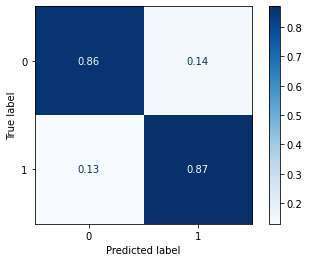

In [ ]:
plot_confusion_matrix(grid_logreg_1.best_estimator_, X_test, y_test,
                                
                                 cmap=plt.cm.Blues,
                                 normalize = 'true')
plt.grid(False)
plt.show()

# STEP 4

In [51]:
embedding_dim = 100
pretrained_weights = np.zeros((len(imdb_vocab), embedding_dim))
words_found = 0
words_not_found = 0

for i, word in enumerate(imdb_vocab.get_itos()):
    try: 
        pretrained_weights[i] = pretrained_vectors.get_vector(word)
        words_found += 1
    except KeyError:
        words_not_found  += 1
        pretrained_weights[i] = np.random.normal(size=(embedding_dim, ))

In [52]:
from torch import nn
class MLPCustom(nn.Module):
  def __init__(self, embed_dim, vocab_size, hidden_dim1, hidden_dim2, output_dim, non_linearity, pretrained_weights):

    super().__init__()    
    self.embed_dim = embed_dim
    self.hidden_dim1 = hidden_dim1
    self.hidden_dim2 = hidden_dim2
    self.output_dim = output_dim
    self.vocab_size = vocab_size
    self.non_linearity = non_linearity
    self.pretrained_weights = pretrained_weights

    # embedding_layer
    #self.embedding = nn.EmbeddingBag(self.vocab_size, self.embed_dim)
    self.embedding = nn.EmbeddingBag(self.vocab_size, self.embed_dim).from_pretrained(self.pretrained_weights,
                                                                               freeze = True)
       
    # hidden layer 1
    self.hidden_layer1 = nn.Linear(self.embed_dim, self.hidden_dim1)

    # dropout layer 1
    self.drop1 = nn.Dropout(p= 0.5)

    # batch layer norm 1
    self.batchnorm1 = nn.BatchNorm1d(num_features=self.hidden_dim1)

    # hidden layer 2
    self.hidden_layer2 = nn.Linear(self.hidden_dim1, self.hidden_dim2)
    
    # dropout layer 2
    self.drop2 = nn.Dropout(p= 0.5)

    # batch layer norm 2    
    self.batchnorm2 = nn.BatchNorm1d(num_features=self.hidden_dim2)
    
    # output layer
    self.output_layer = nn.Linear(self.hidden_dim2, self.output_dim)

  def forward(self, input_ , offsets):
    embed_out = self.embedding(input_, offsets) # batchsize, embedding_dim

    hout1 = self.non_linearity(self.hidden_layer1(embed_out)) # batchsize, hidden_dim1
    hout1 = self.batchnorm1(hout1)
    hout1 = self.drop1(hout1)
    
    hout2 = self.non_linearity(self.hidden_layer2(hout1)) # batchsize, hidden_dim2
    hout2 = self.batchnorm2(hout2)
    hout2 = self.drop2(hout2)
    
    ypred = self.output_layer(hout2)

    return ypred

## <Font color = 'pickle'>**Function for Training  Loops**

**Model Training** involves five steps: 

- Step 0: Randomly initialize parameters / weights
- Step 1: Compute model's predictions - forward pass
- Step 2: Compute loss
- Step 3: Compute the gradients
- Step 4: Update the parameters
- Step 5: Repeat steps 1 - 4

Model training is repeating this process over and over, for many **epochs**.

We will specify number of ***epochs*** and during each epoch we will iterate over the complete dataset and will keep on updating the parameters.

***Learning rate*** and ***epochs*** are known as hyperparameters. We have to adjust the values of these two based on validation dataset.

We will now create functions for step 1 to 4.

In [53]:
def train(train_loader, model, optimizer, loss_function, log_batch, log_interval, grad_clipping, max_norm):

  """ 
  Function for training the model in each epoch
  Input: iterator for train dataset, initial weights and bias, epochs, learning rate.
  Output: final weights, bias, train loss, train accuracy
  """
  # initilalize variables as global
  # these counts will be updated every epoch
  global example_ct_train
  global batch_ct_train

  # Training Loop loop
  # Initialize train_loss at the he start of the epoch
  running_train_loss = 0
  #running_train_correct = 0
  
  # put the model in training mode
  model.train()

  # Iterate on batches from the dataset using train_loader
  for input_, targets, offsets in train_loader:
    
    # move inputs and outputs to GPUs
    input_ = input_.to(device)
    targets = targets.to(device)
    offsets = offsets.to(device)

    # Forward pass
    output = model(input_, offsets)
    loss = loss_function(output, targets.float())

    # Correct prediction
  
    example_ct_train +=  len(targets)
    batch_ct_train += 1

    # set gradients to zero 
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Gradient Clipping
    if grad_clipping:
      nn.utils.clip_grad_norm_(model.parameters(), max_norm=max_norm, norm_type=2)

    # Update parameters using their gradient
    optimizer.step()
          
    # Add train loss of a batch 
    running_train_loss += loss.item()

   
    # log batch loss and accuracy
    if log_batch:
      if ((batch_ct_train + 1) % log_interval) == 0:
        wandb.log({f"Train Batch Loss  :": loss})
       
  # Calculate mean train loss for the whole dataset for a particular epoch
  train_loss = running_train_loss/len(train_loader)

  return train_loss

## <Font color = 'pickle'>**Function for Validation Loops**


In [54]:
def valid(loader, model, optimizer, loss_function, log_batch, log_interval):

  """ 
  Function for training the model and plotting the graph for train & valid loss vs epoch.
  Input: iterator for train dataset, initial weights and bias, epochs, learning rate, batch size.
  Output: final weights, bias and train loss and valid loss for each epoch.
  """

  # initilalize variables as global
  # these counts will be updated every epoch
  global example_ct_valid
  global batch_ct_valid

  # Validation loop
  # Initialize train_loss at the he strat of the epoch
  running_valid_loss = 0
  #running_valid_correct = 0
  
  # put the model in evaluation mode
  model.eval()

  with torch.no_grad():
    for input_,targets, offsets in loader:

      # move inputs and outputs to GPUs
      input_ = input_.to(device)
      targets = targets.to(device)
      offsets = offsets.to(device)

      # Forward pass
      output = model(input_, offsets)
      loss = loss_function(output,targets.float())

      # count of images and batches
      example_ct_valid +=  len(targets)
      batch_ct_valid += 1

      # Add valid loss of a batch 
      running_valid_loss += loss.item()

      # log batch loss and accuracy
      if log_batch:
        if ((batch_ct_valid + 1) % log_interval) == 0:
          wandb.log({f"Valid Batch Loss  :": loss})
          #wandb.log({f"Valid Batch Accuracy :": correct/len(targets)})

    # Calculate mean valid loss for the whole dataset for a particular epoch
    valid_loss = running_valid_loss/len(valid_loader)
    
  return valid_loss

## <Font color = 'pickle'>**Function for Model Training**
    
We will now create a function for step 5 of model training


In [55]:

def train_loop(train_loader, valid_loader, model, loss_function, optimizer, epochs, device, patience, early_stopping,
               file_model):

  '''
  model: specify your model for training
  criterion: loss function 
  optimizer: optimizer like SGD , ADAM etc.
  train loader: function to carete batches for training data
  valid loader : function to create batches for valid data set
  file_model : specify file name for saving your model. This way we can upload the model weights from file. We will not to run model again.
  

  '''
  # Create lists to store train and valid loss at each epoch

  train_loss_history = []
  valid_loss_history = []
  
  delta = 0
  best_score = None
  valid_loss_min = np.Inf
  counter_early_stop=0
  early_stop= False

  from datetime import datetime
  # Iterate for the given number of epochs
  for epoch in range(epochs):
    t0 = datetime.now()
    # Get train loss and accuracy for one epoch

    train_loss = train(train_loader, model, optimizer, loss_function, 
                                  wandb.config.LOG_BATCH, wandb.config.LOG_INTERVAL,
                                  wandb.config.GRAD_CLIPPING, wandb.config.MAX_NORM)
    valid_loss = valid(valid_loader, model, optimizer, loss_function,
                                    wandb.config.LOG_BATCH, wandb.config.LOG_INTERVAL)

    dt = datetime.now() - t0

    # Save history of the Losses and accuracy
    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
 
    if early_stopping:
      score = -valid_loss
      if best_score is None:
        best_score=score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving Model...')
        torch.save(model.state_dict(), file_model)
        valid_loss_min = valid_loss

      elif score < best_score + delta:
        counter_early_stop += 1
        print(f'Early stoping counter: {counter_early_stop} out of {patience}')
        if counter_early_stop > patience:
          early_stop = True
      
      else:
        best_score = score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving model...')
        torch.save(model.state_dict(), file_model)
        counter_early_stop=0
        valid_loss_min = valid_loss

      if early_stop:
        print('Early Stopping')
        break

    else:

      score = -valid_loss
      if best_score is None:
        best_score=score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving Model...')
        torch.save(model.state_dict(), file_model)
        valid_loss_min = valid_loss

      elif score < best_score + delta:
        print(f'Validation loss has not decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Not Saving Model...')
      
      else:
        best_score = score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving model...')
        torch.save(model.state_dict(), file_model)
        valid_loss_min = valid_loss

    # Log the train and valid loss to W&B
    wandb.log({f"Train epoch Loss :": train_loss, f"Valid epoch Loss :": valid_loss })
   
    # Print the train loss and accuracy for given number of epochs, batch size and number of samples
    print(f'Epoch : {epoch+1} / {epochs}')
    print(f'Time to complete {epoch+1} is {dt}')
    print(f'Train Loss: {train_loss : .4f}')
    print(f'Valid Loss: {valid_loss : .4f}')
    print()
    torch.cuda.empty_cache()

  return train_loss_history, valid_loss_history

## <Font color = 'pickle'>**Function to get Predictions**

Now we have final values for weights and bias after training the model. We will use these values to make predictions on the test dataset.

In [56]:
def get_pred(data_loader, model):
  """ 
  Function to get predictions for a given test set and calculate accuracy.
  Input: Iterator to the test set.
  Output: Prections and Accuracy for test set.
  """
  model.eval()
  with torch.no_grad():
    # Array to store predicted labels
    predictions = torch.Tensor()
    predictions = predictions.to(device)
    
    outputs = torch.Tensor()
    outputs = outputs.to(device)

    # Array to store actual labels
    y = torch.Tensor()
    y = y.to(device)
    # Iterate over batches from test set
    for inputs, targets, offsets in data_loader:
      
      # move inputs and outputs to GPUs
      inputs = inputs.to(device)
      targets = targets.to(device)
      offsets = offsets.to(device)
      
      # Calculated the predicted labels
      output = model(inputs,offsets)
      predicted_y = output.clone()
  
      # Update teh output 
      predicted_y[predicted_y>0] = 1
      predicted_y[predicted_y<=0] =0

      # Add the predicted labels to the array
      predictions = torch.cat((predictions, predicted_y)) 
    
      outputs = torch.cat((outputs, output)) 

      # Add the actual labels to the array
      y = torch.cat((y, targets)) 

  # Return array containing predictions and accuracy
  return y, predictions
  

# <Font color = 'pickle'>**Meta Data**

In [83]:
from types import SimpleNamespace
import torch.nn.functional as F

hyperparameters = SimpleNamespace(
    EMBED_DIM = 100,
    VOCAB_SIZE = len(imdb_vocab),
    PRETRAINED_WEIGHTS_TENSOR = torch.tensor(pretrained_weights).float(),
    OUTPUT_DIM = 10,
    HIDDEN_DIM1 = 100,
    HIDDEN_DIM2 = 256,
    NON_LINEARITY= F.relu,
    EPOCHS = 40,
    TASK = 2,
    BATCH_SIZE = 256,
    LEARNING_RATE = 0.01,
    DATASET="Multilabel",
    ARCHITECTUREe="HW6B_embedbag_2hiddenlayers",
    LOG_INTERVAL = 25,
    LOG_BATCH = True,
    FILE_MODEL = data_folder/'HW6B.pt',
    GRAD_CLIPPING = False,
    MAX_NORM = 0,
    MOMENTUM = 0,
    PATIENCE = 5,
    EARLY_STOPPING = True,
    SCHEDULER_FACTOR = 0,
    SCHEDULER_PATIENCE = 0,
    WEIGHT_DECAY = 0,
    SAVE_BEST_MODEL = True,
    DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    )

# <Font color = 'pickle'>**Data Loaders, Loss Function, Optimizer**

In [84]:
# Initialize a new project
import random
wandb.init(name = 'EmbedBagNN', project = 'NLP_HW6B')

In [85]:
wandb.config = hyperparameters
wandb.config

namespace(ARCHITECTUREe='HW6B_embedbag_2hiddenlayers', BATCH_SIZE=256, DATASET='Multilabel', DEVICE=device(type='cuda', index=0), EARLY_STOPPING=True, EMBED_DIM=100, EPOCHS=40, FILE_MODEL=PosixPath('/content/drive/MyDrive/NLP_Fall22/HW6/Data/HW6B.pt'), GRAD_CLIPPING=False, HIDDEN_DIM1=100, HIDDEN_DIM2=256, LEARNING_RATE=0.01, LOG_BATCH=True, LOG_INTERVAL=25, MAX_NORM=0, MOMENTUM=0, NON_LINEARITY=<function relu at 0x7f8cf0cf6f80>, OUTPUT_DIM=10, PATIENCE=5, PRETRAINED_WEIGHTS_TENSOR=tensor([[-0.7141,  0.9900, -1.4135,  ..., -0.8638,  0.5628, -0.5497],
        [-0.2081, -0.4199,  0.2065,  ..., -0.3177,  0.3818,  2.3283],
        [ 0.3271,  2.1636, -0.2534,  ...,  0.9485, -2.0070, -0.7436],
        ...,
        [-0.5787,  0.4951, -1.1303,  ..., -0.3958,  0.0041, -0.1252],
        [-0.1817,  2.1693, -0.1496,  ...,  0.4467, -1.7915,  0.3126],
        [-0.4754, -0.5761,  1.0262,  ...,  0.9127,  0.2081,  0.6185]]), SAVE_BEST_MODEL=True, SCHEDULER_FACTOR=0, SCHEDULER_PATIENCE=0, TASK=2, VOCAB_

In [86]:
# Fix seed value
SEED = 2345
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

# Data Loader
train_loader = torch.utils.data.DataLoader(trainset, batch_size=wandb.config.BATCH_SIZE, shuffle = True, 
                                            num_workers = 12, collate_fn=collate_batch)
valid_loader =  torch.utils.data.DataLoader(validset,  collate_fn=collate_batch,batch_size=wandb.config.BATCH_SIZE, shuffle = False, 
                                            num_workers = 12)
test_loader = torch.utils.data.DataLoader(testset, collate_fn=collate_batch, batch_size=wandb.config.BATCH_SIZE, shuffle = False, 
                                            num_workers = 12)

# cross entropy loss function
loss_function = nn.BCEWithLogitsLoss()


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
wandb.config.DEVICE = device
 
# model 
model_hw6_part_b_task4 = MLPCustom(wandb.config.EMBED_DIM, 
                  wandb.config.VOCAB_SIZE,
                  wandb.config.HIDDEN_DIM1, 
                  wandb.config.HIDDEN_DIM2,
                  wandb.config.OUTPUT_DIM, 
                  wandb.config.NON_LINEARITY,
                  wandb.config.PRETRAINED_WEIGHTS_TENSOR)

model_hw6_part_b_task4.to(wandb.config.DEVICE)

def init_weights(m):
  if type(m) == nn.Linear:
      torch.nn.init.kaiming_normal_(m.weight)
      torch.nn.init.zeros_(m.bias)
        
# apply initialization recursively  to all modules

optimizer = torch.optim.Adam(model_hw6_part_b_task4.parameters(), lr = wandb.config.LEARNING_RATE, 
                            weight_decay=wandb.config.WEIGHT_DECAY)


scheduler = ReduceLROnPlateau(optimizer, mode='min', factor= wandb.config.SCHEDULER_FACTOR, 
                              patience=wandb.config.SCHEDULER_PATIENCE, verbose=True)



In [87]:
wandb.config

namespace(ARCHITECTUREe='HW6B_embedbag_2hiddenlayers', BATCH_SIZE=256, DATASET='Multilabel', DEVICE=device(type='cuda', index=0), EARLY_STOPPING=True, EMBED_DIM=100, EPOCHS=40, FILE_MODEL=PosixPath('/content/drive/MyDrive/NLP_Fall22/HW6/Data/HW6B.pt'), GRAD_CLIPPING=False, HIDDEN_DIM1=100, HIDDEN_DIM2=256, LEARNING_RATE=0.01, LOG_BATCH=True, LOG_INTERVAL=25, MAX_NORM=0, MOMENTUM=0, NON_LINEARITY=<function relu at 0x7f8cf0cf6f80>, OUTPUT_DIM=10, PATIENCE=5, PRETRAINED_WEIGHTS_TENSOR=tensor([[-0.7141,  0.9900, -1.4135,  ..., -0.8638,  0.5628, -0.5497],
        [-0.2081, -0.4199,  0.2065,  ..., -0.3177,  0.3818,  2.3283],
        [ 0.3271,  2.1636, -0.2534,  ...,  0.9485, -2.0070, -0.7436],
        ...,
        [-0.5787,  0.4951, -1.1303,  ..., -0.3958,  0.0041, -0.1252],
        [-0.1817,  2.1693, -0.1496,  ...,  0.4467, -1.7915,  0.3126],
        [-0.4754, -0.5761,  1.0262,  ...,  0.9127,  0.2081,  0.6185]]), SAVE_BEST_MODEL=True, SCHEDULER_FACTOR=0, SCHEDULER_PATIENCE=0, TASK=2, VOCAB_

# <Font color = 'pickle'>**Sanity Check**
- Check the loss without any training. For Cross entropy the expected value will be log(number of classes)

In [91]:
for input_, targets, offsets in train_loader:
  
  # move inputs and outputs to GPUs
  input_ = input_.to(device)
  targets = targets.to(device)
  offsets = offsets.to(device)
  model_hw6_part_b_task4.eval()
  # Forward pass
  output = model_hw6_part_b_task4(input_, offsets)
  loss = loss_function(output, targets.float())
  print(f'Actual loss: {loss}')
  break

print(f'Expected Theoretical loss: {np.log(2)}')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Actual loss: 0.6981068253517151
Expected Theoretical loss: 0.6931471805599453


# <Font color = 'pickle'>**Training Model**

In [92]:
wandb.watch(model_hw6_part_b_task4, log = 'all', log_freq=25, log_graph=True)

wandb: logging graph, to disable use `wandb.watch(log_graph=False)`


In [93]:
example_ct_train, batch_ct_train, example_ct_valid, batch_ct_valid = 0, 0, 0, 0

train_loss_history, valid_loss_history = train_loop(train_loader, 
                                                    valid_loader, 
                                                    model_hw6_part_b_task4,
                                                    loss_function, 
                                                    optimizer, 
                                                    wandb.config.EPOCHS, 
                                                    wandb.config.DEVICE,
                                                    wandb.config.PATIENCE, 
                                                    wandb.config.EARLY_STOPPING,
                                                    wandb.config.FILE_MODEL)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Validation loss has decreased (inf --> 0.228111). Saving Model...
Epoch : 1 / 40
Time to complete 1 is 0:00:07.418288
Train Loss:  0.3103
Valid Loss:  0.2281

Validation loss has decreased (0.228111 --> 0.220511). Saving model...
Epoch : 2 / 40
Time to complete 2 is 0:00:06.747869
Train Loss:  0.2401
Valid Loss:  0.2205

Validation loss has decreased (0.220511 --> 0.213334). Saving model...
Epoch : 3 / 40
Time to complete 3 is 0:00:06.673558
Train Loss:  0.2331
Valid Loss:  0.2133

Validation loss has decreased (0.213334 --> 0.209185). Saving model...
Epoch : 4 / 40
Time to complete 4 is 0:00:06.771623
Train Loss:  0.2258
Valid Loss:  0.2092

Early stoping counter: 1 out of 5
Epoch : 5 / 40
Time to complete 5 is 0:00:06.774637
Train Loss:  0.2217
Valid Loss:  0.2121

Validation loss has decreased (0.209185 --> 0.203638). Saving model...
Epoch : 6 / 40
Time to complete 6 is 0:00:06.885702
Train Loss:  0.2167
Valid Loss:  0.2036

Early stoping counter: 1 out of 5
Epoch : 7 / 40
Time to c

## Load saved model from file 

In [94]:
model_nn = MLPCustom(wandb.config.EMBED_DIM, 
                     wandb.config.VOCAB_SIZE,
                     wandb.config.HIDDEN_DIM1, 
                     wandb.config.HIDDEN_DIM2, 
                  wandb.config.OUTPUT_DIM, 
                  wandb.config.NON_LINEARITY,
                  wandb.config.PRETRAINED_WEIGHTS_TENSOR)
model_nn.to(  wandb.config.DEVICE)
model_nn.load_state_dict(torch.load(wandb.config.FILE_MODEL))

<All keys matched successfully>

In [95]:
print(wandb.config.FILE_MODEL)

/content/drive/MyDrive/NLP_Fall22/HW6/Data/HW6B.pt


In [96]:
# Get the prediction and labels
y_train,  y_predicted_train = get_pred(train_loader, model_nn)
y_valid, y_predicted_valid = get_pred(valid_loader, model_nn)
y_test,  y_predicted_test  = get_pred(test_loader, model_nn)

In [97]:
!pip install torchmetrics
from torchmetrics import F1Score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 529 kB 34.0 MB/s 


In [98]:
f1score  = F1Score(num_classes=10, mdmc_average= 'global').to(device)

In [99]:
train_f1_score = f1score( y_predicted_train, y_train.long())

In [100]:
train_f1_score

tensor(0.8474, device='cuda:0')

In [101]:
# convert these to numpy array
y_train, y_predicted_train  = y_train.cpu().numpy(), y_predicted_train.cpu().numpy() 
y_valid, y_predicted_valid  = y_valid.cpu().numpy(), y_predicted_valid.cpu().numpy() 
y_test, y_predicted_test  = y_test.cpu().numpy(), y_predicted_test.cpu().numpy() 

In [102]:
from sklearn.metrics import f1_score

In [103]:
f1_score_train = f1_score(y_train, y_predicted_train, average = 'micro')
f1_score_valid = f1_score(y_valid, y_predicted_valid, average = 'micro')
f1_score_test = f1_score(y_test, y_predicted_test, average = 'micro')

In [104]:
# Print Accuracy based on saved Model
print('f1_score_train', f1_score_train)
print('f1_score_valid', f1_score_valid)
print('f1_score_test', f1_score_test)

f1_score_train 0.8473589303777983
f1_score_valid 0.8078518991382063
f1_score_test 0.8031756180733163


In [105]:
wandb.log({'Train f1 score': f1_score_train})
wandb.log({'Valid f1 score': f1_score_valid}) 
wandb.log({'Test f1 score': f1_score_test})

In [ ]:
wandb.finish()

Test f1 score,▁
Train Batch Loss :,█▇▆▅▄▄▃▄▄▃▃▃▃▂▃▂▃▂▂▃▂▂▂▂▂▂▁▂▂▂▂▁▂▁▁▁▁▂▁▁
Train epoch Loss :,█▄▃▂▂▁▁▁
Train f1 score,▁
Valid Batch Loss :,▅▅▁▃▆▂▃▅▄▅▇▂█
Valid epoch Loss :,█▂▁▁▂▄▆█
Valid f1 score,▁
Test f1 score,0.90754
Train Batch Loss :,0.0267
Train epoch Loss :,0.03324
Train f1 score,0.96112


# STEP 5

In [ ]:
embedding_dim = 100
pretrained_weights = np.zeros((len(imdb_vocab), embedding_dim))
words_found = 0
words_not_found = 0

for i, word in enumerate(imdb_vocab.get_itos()):
    try: 
        pretrained_weights[i] = pretrained_vectors.get_vector(word)
        words_found += 1
    except KeyError:
        words_not_found  += 1
        pretrained_weights[i] = np.random.normal(size=(embedding_dim, ))

In [106]:
from torch import nn
class MLPCustom(nn.Module):
  def __init__(self, embed_dim, vocab_size, hidden_dim1, hidden_dim2, output_dim, non_linearity, pretrained_weights):

    super().__init__()    
    self.embed_dim = embed_dim
    self.hidden_dim1 = hidden_dim1
    self.hidden_dim2 = hidden_dim2
    self.output_dim = output_dim
    self.vocab_size = vocab_size
    self.non_linearity = non_linearity
    self.pretrained_weights = pretrained_weights

    # embedding_layer
    #self.embedding = nn.EmbeddingBag(self.vocab_size, self.embed_dim)
    self.embedding = nn.EmbeddingBag(self.vocab_size, self.embed_dim).from_pretrained(self.pretrained_weights,
                                                                               freeze = False)
       
    # hidden layer 1
    self.hidden_layer1 = nn.Linear(self.embed_dim, self.hidden_dim1)

    # dropout layer 1
    self.drop1 = nn.Dropout(p= 0.5)

    # batch layer norm 1
    self.batchnorm1 = nn.BatchNorm1d(num_features=self.hidden_dim1)

    # hidden layer 2
    self.hidden_layer2 = nn.Linear(self.hidden_dim1, self.hidden_dim2)
    
    # dropout layer 2
    self.drop2 = nn.Dropout(p= 0.5)

    # batch layer norm 2    
    self.batchnorm2 = nn.BatchNorm1d(num_features=self.hidden_dim2)
    
    # output layer
    self.output_layer = nn.Linear(self.hidden_dim2, self.output_dim)

  def forward(self, input_ , offsets):
    embed_out = self.embedding(input_, offsets) # batchsize, embedding_dim

    hout1 = self.non_linearity(self.hidden_layer1(embed_out)) # batchsize, hidden_dim1
    hout1 = self.batchnorm1(hout1)
    hout1 = self.drop1(hout1)
    
    hout2 = self.non_linearity(self.hidden_layer2(hout1)) # batchsize, hidden_dim2
    hout2 = self.batchnorm2(hout2)
    hout2 = self.drop2(hout2)
    
    ypred = self.output_layer(hout2)

    return ypred

## <Font color = 'pickle'>**Function for Training  Loops**

**Model Training** involves five steps: 

- Step 0: Randomly initialize parameters / weights
- Step 1: Compute model's predictions - forward pass
- Step 2: Compute loss
- Step 3: Compute the gradients
- Step 4: Update the parameters
- Step 5: Repeat steps 1 - 4

Model training is repeating this process over and over, for many **epochs**.

We will specify number of ***epochs*** and during each epoch we will iterate over the complete dataset and will keep on updating the parameters.

***Learning rate*** and ***epochs*** are known as hyperparameters. We have to adjust the values of these two based on validation dataset.

We will now create functions for step 1 to 4.

In [107]:
def train(train_loader, model, optimizer, loss_function, log_batch, log_interval, grad_clipping, max_norm):

  """ 
  Function for training the model in each epoch
  Input: iterator for train dataset, initial weights and bias, epochs, learning rate.
  Output: final weights, bias, train loss, train accuracy
  """
  # initilalize variables as global
  # these counts will be updated every epoch
  global example_ct_train
  global batch_ct_train

  # Training Loop loop
  # Initialize train_loss at the he start of the epoch
  running_train_loss = 0
  #running_train_correct = 0
  
  # put the model in training mode
  model.train()

  # Iterate on batches from the dataset using train_loader
  for input_, targets, offsets in train_loader:
    
    # move inputs and outputs to GPUs
    input_ = input_.to(device)
    targets = targets.to(device)
    offsets = offsets.to(device)

    # Forward pass
    output = model(input_, offsets)
    loss = loss_function(output, targets.float())

    example_ct_train +=  len(targets)
    batch_ct_train += 1

    # set gradients to zero 
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Gradient Clipping
    if grad_clipping:
      nn.utils.clip_grad_norm_(model.parameters(), max_norm=max_norm, norm_type=2)

    # Update parameters using their gradient
    optimizer.step()
          
    # Add train loss of a batch 
    running_train_loss += loss.item()

    # Add Corect counts of a batch
    # log batch loss and accuracy
    if log_batch:
      if ((batch_ct_train + 1) % log_interval) == 0:
        wandb.log({f"Train Batch Loss  :": loss})
        #wandb.log({f"Train Batch Acc :": correct/len(targets)})
 
  # Calculate mean train loss for the whole dataset for a particular epoch
  train_loss = running_train_loss/len(train_loader)

 
  return train_loss

## <Font color = 'pickle'>**Function for Validation Loops**


In [108]:
def valid(loader, model, optimizer, loss_function, log_batch, log_interval):

  """ 
  Function for training the model and plotting the graph for train & valid loss vs epoch.
  Input: iterator for train dataset, initial weights and bias, epochs, learning rate, batch size.
  Output: final weights, bias and train loss and valid loss for each epoch.
  """

  # initilalize variables as global
  # these counts will be updated every epoch
  global example_ct_valid
  global batch_ct_valid

  # Validation loop
  # Initialize train_loss at the he strat of the epoch
  running_valid_loss = 0
  #running_valid_correct = 0
  
  # put the model in evaluation mode
  model.eval()

  with torch.no_grad():
    for input_,targets, offsets in loader:

      # move inputs and outputs to GPUs
      input_ = input_.to(device)
      targets = targets.to(device)
      offsets = offsets.to(device)

      # Forward pass
      output = model(input_, offsets)
      loss = loss_function(output,targets.float())

      # count of images and batches
      example_ct_valid +=  len(targets)
      batch_ct_valid += 1

      # Add valid loss of a batch 
      running_valid_loss += loss.item()

      # Add correct count for each batch
    
      # log batch loss and accuracy
      if log_batch:
        if ((batch_ct_valid + 1) % log_interval) == 0:
          wandb.log({f"Valid Batch Loss  :": loss})
          #wandb.log({f"Valid Batch Accuracy :": correct/len(targets)})

    # Calculate mean valid loss for the whole dataset for a particular epoch
    valid_loss = running_valid_loss/len(valid_loader)

    
  return valid_loss

## <Font color = 'pickle'>**Function for Model Training**
    
We will now create a function for step 5 of model training


In [109]:

def train_loop(train_loader, valid_loader, model, loss_function, optimizer, epochs, device, patience, early_stopping,
               file_model):

  '''
  model: specify your model for training
  criterion: loss function 
  optimizer: optimizer like SGD , ADAM etc.
  train loader: function to carete batches for training data
  valid loader : function to create batches for valid data set
  file_model : specify file name for saving your model. This way we can upload the model weights from file. We will not to run model again.
  

  '''
  # Create lists to store train and valid loss at each epoch

  train_loss_history = []
  valid_loss_history = []
  
  delta = 0
  best_score = None
  valid_loss_min = np.Inf
  counter_early_stop=0
  early_stop= False

  from datetime import datetime
  # Iterate for the given number of epochs
  for epoch in range(epochs):
    t0 = datetime.now()
    # Get train loss and accuracy for one epoch

    train_loss = train(train_loader, model, optimizer, loss_function, 
                                  wandb.config.LOG_BATCH, wandb.config.LOG_INTERVAL,
                                  wandb.config.GRAD_CLIPPING, wandb.config.MAX_NORM)
    valid_loss = valid(valid_loader, model, optimizer, loss_function,
                                    wandb.config.LOG_BATCH, wandb.config.LOG_INTERVAL)

    dt = datetime.now() - t0

    # Save history of the Losses and accuracy
    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    
    if early_stopping:
      score = -valid_loss
      if best_score is None:
        best_score=score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving Model...')
        torch.save(model.state_dict(), file_model)
        valid_loss_min = valid_loss

      elif score < best_score + delta:
        counter_early_stop += 1
        print(f'Early stoping counter: {counter_early_stop} out of {patience}')
        if counter_early_stop > patience:
          early_stop = True
      
      else:
        best_score = score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving model...')
        torch.save(model.state_dict(), file_model)
        counter_early_stop=0
        valid_loss_min = valid_loss

      if early_stop:
        print('Early Stopping')
        break

    else:

      score = -valid_loss
      if best_score is None:
        best_score=score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving Model...')
        torch.save(model.state_dict(), file_model)
        valid_loss_min = valid_loss

      elif score < best_score + delta:
        print(f'Validation loss has not decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Not Saving Model...')
      
      else:
        best_score = score
        print(f'Validation loss has decreased ({valid_loss_min:.6f} --> {valid_loss:.6f}). Saving model...')
        torch.save(model.state_dict(), file_model)
        valid_loss_min = valid_loss

    # Log the train and valid loss to W&B
    wandb.log({f"Train epoch Loss :": train_loss, f"Valid epoch Loss :": valid_loss })
    
    # Print the train loss and accuracy for given number of epochs, batch size and number of samples
    print(f'Epoch : {epoch+1} / {epochs}')
    print(f'Time to complete {epoch+1} is {dt}')
    print(f'Train Loss: {train_loss : .4f}')
    print(f'Valid Loss: {valid_loss : .4f}')
    print()
    torch.cuda.empty_cache()

  return train_loss_history, valid_loss_history

## <Font color = 'pickle'>**Function to get Predictions**

Now we have final values for weights and bias after training the model. We will use these values to make predictions on the test dataset.

In [110]:
def get_pred(data_loader, model):
  """ 
  Function to get predictions for a given test set and calculate accuracy.
  Input: Iterator to the test set.
  Output: Prections and Accuracy for test set.
  """
  model.eval()
  with torch.no_grad():
    # Array to store predicted labels
    predictions = torch.Tensor()
    predictions = predictions.to(device)
    
    outputs = torch.Tensor()
    outputs = outputs.to(device)

    # Array to store actual labels
    y = torch.Tensor()
    y = y.to(device)
    # Iterate over batches from test set
    for inputs, targets, offsets in data_loader:
      
      # move inputs and outputs to GPUs
      inputs = inputs.to(device)
      targets = targets.to(device)
      offsets = offsets.to(device)
      
      # Calculated the predicted labels
      output = model(inputs,offsets)
      predicted_y = output.clone()
  
      # Update teh output 
      predicted_y[predicted_y>0] = 1
      predicted_y[predicted_y<=0] =0

      # Add the predicted labels to the array
      predictions = torch.cat((predictions, predicted_y)) 
    
      outputs = torch.cat((outputs, output)) 

      # Add the actual labels to the array
      y = torch.cat((y, targets)) 

  # Return array containing predictions and accuracy
  return y, predictions
  

# <Font color = 'pickle'>**Meta Data**

In [111]:
from types import SimpleNamespace
import torch.nn.functional as F

hyperparameters = SimpleNamespace(
    EMBED_DIM = 100,
    VOCAB_SIZE = len(imdb_vocab),
    PRETRAINED_WEIGHTS_TENSOR = torch.tensor(pretrained_weights).float(),
    OUTPUT_DIM = 10,
    HIDDEN_DIM1 = 100,
    HIDDEN_DIM2 = 256,
    NON_LINEARITY= F.relu,
    EPOCHS = 40,
    TASK = 2,
    BATCH_SIZE = 256,
    LEARNING_RATE = 0.01,
    DATASET="Multilabel",
    ARCHITECTUREe="HW6B_embedbag_2hiddenlayers",
    LOG_INTERVAL = 25,
    LOG_BATCH = True,
    FILE_MODEL = data_folder/'HW6B.pt',
    GRAD_CLIPPING = False,
    MAX_NORM = 0,
    MOMENTUM = 0,
    PATIENCE = 5,
    EARLY_STOPPING = True,
    SCHEDULER_FACTOR = 0,
    SCHEDULER_PATIENCE = 0,
    WEIGHT_DECAY = 0,
    SAVE_BEST_MODEL = True,
    DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    )

# <Font color = 'pickle'>**Data Loaders, Loss Function, Optimizer**

In [112]:
# Initialize a new project
import random
wandb.init(name = 'EmbedBagNN', project = 'NLP_HW6B')

Test f1 score,▁
Train Batch Loss :,▇▆▅█▆▂▄▃▃▄▄▃▂▄▃▂▃▃▃▅▃▂▂▂▃▂▂▂▃▃▄▁▂▂▂▂▃▃▂▃
Train epoch Loss :,█▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Train f1 score,▁
Valid Batch Loss :,▆▆▄▇▅▄▄▅▄▅▄▇▃▂▂▅▅▅▃▄▃▃▅█▅▃▄▂▅▁▂▅▅▃▄▃▆▃▁▂
Valid epoch Loss :,█▇▅▄▅▃▄▃▃▃▃▂▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▂▁▁▁▂▁▂▁▁▁▁
Valid f1 score,▁
Test f1 score,0.80318
Train Batch Loss :,0.20359
Train epoch Loss :,0.19439
Train f1 score,0.84736


In [113]:
wandb.config = hyperparameters
wandb.config

namespace(ARCHITECTUREe='HW6B_embedbag_2hiddenlayers', BATCH_SIZE=256, DATASET='Multilabel', DEVICE=device(type='cuda', index=0), EARLY_STOPPING=True, EMBED_DIM=100, EPOCHS=40, FILE_MODEL=PosixPath('/content/drive/MyDrive/NLP_Fall22/HW6/Data/HW6B.pt'), GRAD_CLIPPING=False, HIDDEN_DIM1=100, HIDDEN_DIM2=256, LEARNING_RATE=0.01, LOG_BATCH=True, LOG_INTERVAL=25, MAX_NORM=0, MOMENTUM=0, NON_LINEARITY=<function relu at 0x7f8cf0cf6f80>, OUTPUT_DIM=10, PATIENCE=5, PRETRAINED_WEIGHTS_TENSOR=tensor([[-0.7141,  0.9900, -1.4135,  ..., -0.8638,  0.5628, -0.5497],
        [-0.2081, -0.4199,  0.2065,  ..., -0.3177,  0.3818,  2.3283],
        [ 0.3271,  2.1636, -0.2534,  ...,  0.9485, -2.0070, -0.7436],
        ...,
        [-0.5787,  0.4951, -1.1303,  ..., -0.3958,  0.0041, -0.1252],
        [-0.1817,  2.1693, -0.1496,  ...,  0.4467, -1.7915,  0.3126],
        [-0.4754, -0.5761,  1.0262,  ...,  0.9127,  0.2081,  0.6185]]), SAVE_BEST_MODEL=True, SCHEDULER_FACTOR=0, SCHEDULER_PATIENCE=0, TASK=2, VOCAB_

In [115]:
# Fix seed value
SEED = 2345
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

# Data Loader
train_loader = torch.utils.data.DataLoader(trainset, batch_size=wandb.config.BATCH_SIZE, shuffle = True, 
                                            num_workers = 12, collate_fn=collate_batch)
valid_loader =  torch.utils.data.DataLoader(validset,  collate_fn=collate_batch,batch_size=wandb.config.BATCH_SIZE, shuffle = False, 
                                            num_workers = 12)
test_loader = torch.utils.data.DataLoader(testset, collate_fn=collate_batch, batch_size=wandb.config.BATCH_SIZE, shuffle = False, 
                                            num_workers = 12)

# cross entropy loss function
loss_function = nn.BCEWithLogitsLoss()


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
wandb.config.DEVICE = device
 
# model 
model_hw6_part_b_task6 = MLPCustom(wandb.config.EMBED_DIM, 
                  wandb.config.VOCAB_SIZE,
                  wandb.config.HIDDEN_DIM1, 
                  wandb.config.HIDDEN_DIM2,
                  wandb.config.OUTPUT_DIM, 
                  wandb.config.NON_LINEARITY,
                  wandb.config.PRETRAINED_WEIGHTS_TENSOR)

model_hw6_part_b_task6.to(wandb.config.DEVICE)

def init_weights(m):
  if type(m) == nn.Linear:
      torch.nn.init.kaiming_normal_(m.weight)
      torch.nn.init.zeros_(m.bias)
 
optimizer = torch.optim.Adam(model_hw6_part_b_task6.parameters(), lr = wandb.config.LEARNING_RATE, 
                            weight_decay=wandb.config.WEIGHT_DECAY)


scheduler = ReduceLROnPlateau(optimizer, mode='min', factor= wandb.config.SCHEDULER_FACTOR, 
                              patience=wandb.config.SCHEDULER_PATIENCE, verbose=True)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [116]:
wandb.config

namespace(ARCHITECTUREe='HW6B_embedbag_2hiddenlayers', BATCH_SIZE=256, DATASET='Multilabel', DEVICE=device(type='cuda', index=0), EARLY_STOPPING=True, EMBED_DIM=100, EPOCHS=40, FILE_MODEL=PosixPath('/content/drive/MyDrive/NLP_Fall22/HW6/Data/HW6B.pt'), GRAD_CLIPPING=False, HIDDEN_DIM1=100, HIDDEN_DIM2=256, LEARNING_RATE=0.01, LOG_BATCH=True, LOG_INTERVAL=25, MAX_NORM=0, MOMENTUM=0, NON_LINEARITY=<function relu at 0x7f8cf0cf6f80>, OUTPUT_DIM=10, PATIENCE=5, PRETRAINED_WEIGHTS_TENSOR=tensor([[-0.7141,  0.9900, -1.4135,  ..., -0.8638,  0.5628, -0.5497],
        [-0.2081, -0.4199,  0.2065,  ..., -0.3177,  0.3818,  2.3283],
        [ 0.3271,  2.1636, -0.2534,  ...,  0.9485, -2.0070, -0.7436],
        ...,
        [-0.5787,  0.4951, -1.1303,  ..., -0.3958,  0.0041, -0.1252],
        [-0.1817,  2.1693, -0.1496,  ...,  0.4467, -1.7915,  0.3126],
        [-0.4754, -0.5761,  1.0262,  ...,  0.9127,  0.2081,  0.6185]]), SAVE_BEST_MODEL=True, SCHEDULER_FACTOR=0, SCHEDULER_PATIENCE=0, TASK=2, VOCAB_

# <Font color = 'pickle'>**Sanity Check**
- Check the loss without any training. For Cross entropy the expected value will be log(number of classes)

In [117]:
for input_, targets, offsets in train_loader:
  
  # move inputs and outputs to GPUs
  input_ = input_.to(device)
  targets = targets.to(device)
  offsets = offsets.to(device)
  model_hw6_part_b_task6.eval()
  # Forward pass
  output = model_hw6_part_b_task6(input_, offsets)
  loss = loss_function(output, targets.float())
  print(f'Actual loss: {loss}')
  break

print(f'Expected Theoretical loss: {np.log(2)}')

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Actual loss: 0.6922447085380554
Expected Theoretical loss: 0.6931471805599453


# <Font color = 'pickle'>**Training Model**

In [118]:
wandb.watch(model_hw6_part_b_task6, log = 'all', log_freq=25, log_graph=True)

wandb: logging graph, to disable use `wandb.watch(log_graph=False)`


In [119]:
example_ct_train, batch_ct_train, example_ct_valid, batch_ct_valid = 0, 0, 0, 0

train_loss_history, valid_loss_history = train_loop(train_loader, 
                                                    valid_loader, 
                                                    model_hw6_part_b_task6,
                                                    loss_function, 
                                                    optimizer, 
                                                    wandb.config.EPOCHS, 
                                                    wandb.config.DEVICE,
                                                    wandb.config.PATIENCE, 
                                                    wandb.config.EARLY_STOPPING,
                                                    wandb.config.FILE_MODEL)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Validation loss has decreased (inf --> 0.137795). Saving Model...
Epoch : 1 / 40
Time to complete 1 is 0:00:07.180063
Train Loss:  0.2415
Valid Loss:  0.1378

Validation loss has decreased (0.137795 --> 0.120911). Saving model...
Epoch : 2 / 40
Time to complete 2 is 0:00:07.065598
Train Loss:  0.1193
Valid Loss:  0.1209

Validation loss has decreased (0.120911 --> 0.107032). Saving model...
Epoch : 3 / 40
Time to complete 3 is 0:00:07.027402
Train Loss:  0.0892
Valid Loss:  0.1070

Early stoping counter: 1 out of 5
Epoch : 4 / 40
Time to complete 4 is 0:00:08.755269
Train Loss:  0.0704
Valid Loss:  0.1079

Early stoping counter: 2 out of 5
Epoch : 5 / 40
Time to complete 5 is 0:00:08.980564
Train Loss:  0.0572
Valid Loss:  0.1110

Early stoping counter: 3 out of 5
Epoch : 6 / 40
Time to complete 6 is 0:00:07.926105
Train Loss:  0.0479
Valid Loss:  0.1151

Early stoping counter: 4 out of 5
Epoch : 7 / 40
Time to complete 7 is 0:00:08.265436
Train Loss:  0.0427
Valid Loss:  0.1198

Early

## Load saved model from file 

In [120]:
model_nn = MLPCustom(wandb.config.EMBED_DIM, 
                     wandb.config.VOCAB_SIZE,
                     wandb.config.HIDDEN_DIM1, 
                     wandb.config.HIDDEN_DIM2, 
                  wandb.config.OUTPUT_DIM, 
                  wandb.config.NON_LINEARITY,
                  wandb.config.PRETRAINED_WEIGHTS_TENSOR)
model_nn.to(  wandb.config.DEVICE)
model_nn.load_state_dict(torch.load(wandb.config.FILE_MODEL))

<All keys matched successfully>

In [121]:
print(wandb.config.FILE_MODEL)

/content/drive/MyDrive/NLP_Fall22/HW6/Data/HW6B.pt


In [122]:
# Get the prediction and labels
y_train,  y_predicted_train = get_pred(train_loader, model_nn)
y_valid, y_predicted_valid = get_pred(valid_loader, model_nn)
y_test,  y_predicted_test  = get_pred(test_loader, model_nn)

In [123]:
!pip install torchmetrics
from torchmetrics import F1Score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
f1score  = F1Score(num_classes=10, mdmc_average= 'global').to(device)

In [125]:
train_f1_score = f1score( y_predicted_train, y_train.long())

In [126]:
train_f1_score

tensor(0.9533, device='cuda:0')

In [127]:
# convert these to numpy array
y_train, y_predicted_train  = y_train.cpu().numpy(), y_predicted_train.cpu().numpy() 
y_valid, y_predicted_valid  = y_valid.cpu().numpy(), y_predicted_valid.cpu().numpy() 
y_test, y_predicted_test  = y_test.cpu().numpy(), y_predicted_test.cpu().numpy() 

In [128]:
from sklearn.metrics import f1_score

In [129]:
f1_score_train = f1_score(y_train, y_predicted_train, average = 'micro')
f1_score_valid = f1_score(y_valid, y_predicted_valid, average = 'micro')
f1_score_test = f1_score(y_test, y_predicted_test, average = 'micro')

In [130]:
# Print Accuracy based on saved Model
print('f1_score_train', f1_score_train)
print('f1_score_valid', f1_score_valid)
print('f1_score_test', f1_score_test)

f1_score_train 0.9533366270848596
f1_score_valid 0.9106635616859022
f1_score_test 0.9037845594075895


In [131]:
wandb.log({'Train f1 score': f1_score_train})
wandb.log({'Valid f1 score': f1_score_valid}) 
wandb.log({'Test f1 score': f1_score_test})

In [132]:
wandb.finish()

Test f1 score,▁
Train Batch Loss :,█▆▆▆▅▄▄▄▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▂▂▂▁▁▂▂▁▂▂▁▁▂▁▁▁
Train epoch Loss :,█▄▃▂▂▁▁▁
Train f1 score,▁
Valid Batch Loss :,▇▇▂▂▇▁▂▅▄▃█▂█
Valid epoch Loss :,█▄▁▁▂▃▄▆
Valid f1 score,▁
Test f1 score,0.90378
Train Batch Loss :,0.02775
Train epoch Loss :,0.03801
Train f1 score,0.95334
